# FC analysis

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
import sys, operator
sys.path.append('/home/anthony/Documents/Etudes/M1Bio/StageM1/Analysis/FC_Analysis')
import os as os
import numpy as np
#from display_all_psth.py import display_all_PSTH
from phy.io import KwikModel
from attrdict import AttrDict
from  matplotlib.pyplot import *
import  matplotlib.pyplot as plt

import sys
sys.path.append('../functions') #this is where we put all the functions.py

from fc_functions import *

In [6]:
#Folder ='/media/matias/DATA/WORKSPACE2/EXP_14/m1s1/'
#file = 'All-EXP_14_160811_ele01_ele16.kwik'
Folder ='/media/matias/DATA/WORKSPACE2/EXP_14/m1s2/'
file = 'All-EXP_14_160811_ele17_ele32.kwik'

data = Folder + file

spikes, sample_rate = readkwikinfo(data)

#spikes = readkwikinfo('EXPECT-160603-1_ele49_ele56.kwik')


#f =io.loadmat('./FC5/times_Channel8.mat')
#spikes = readmat('./FC5/times_Channel2.mat')

#spikes[4]


In [24]:
Folder ='/media/matias/DATA/WORKSPACE2/EXP_13/m3s4/'
file = 'All-160809-3_ele25_ele32.kwik'

data = Folder + file

spikes, sample_rate = readkwikinfo(data)

In [5]:
spikes

{22: AttrDict({'spike_times': array([  8.52800000e-01,   1.75430000e+00,   2.02680000e+00, ...,
         1.73224146e+04,   1.73228446e+04,   1.73238257e+04])}),
 62: AttrDict({'spike_times': array([  2.28666667e-01,   2.63366667e-01,   5.39133333e-01, ...,
         1.73248764e+04,   1.73249125e+04,   1.73253929e+04])}),
 69: AttrDict({'spike_times': array([  4.33333333e-03,   1.55400000e-01,   1.57966667e-01, ...,
         1.73169262e+04,   1.73184590e+04,   1.73229513e+04])}),
 71: AttrDict({'spike_times': array([  1.65066667e-01,   1.72333333e-01,   1.76223333e+00, ...,
         1.73234979e+04,   1.73239227e+04,   1.73244245e+04])}),
 75: AttrDict({'spike_times': array([  1.33666667e-02,   1.64333333e-02,   1.68466667e-01, ...,
         1.73249264e+04,   1.73254017e+04,   1.73254047e+04])})}

In [7]:
sample_rate

30000.0

## Building and displaying

In [7]:
exp = '14'
shank = 'm1s2'
episodes = 220#+182

t_before = 10  # in ms
t_after = 70   # in ms

a = BuildPSTH(spikes, sample_rate, t_before, t_after, FCtimes(), exp , shank, episodes)


# exp = '13'
# shank = 'm3s4'
# episodes = 113

# t_before = 10  # in ms
# t_after = 70   # in ms

# a13 = BuildPSTH(spikes, sample_rate, t_before, t_after, FCtimes(), exp , shank, episodes)

exp14_m1s2_c17
counted 
got hist data 
exp14_m1s2_c18
counted 
got hist data 
exp14_m1s2_c84
counted 
got hist data 
exp14_m1s2_c5
counted 
got hist data 
exp14_m1s2_c22
counted 
got hist data 
exp14_m1s2_c89
counted 
got hist data 
exp14_m1s2_c90
counted 
got hist data 


In [31]:
counts = {}
histdata = {}

for codename in list(a13.keys()):
    counts.update({str(a13[codename].clusnum): a13[codename].psth_counts})
    histdata.update({str(a13[codename].clusnum): a13[codename].psth_times})
    print(codename)


exp13_m3s4_c63
exp13_m3s4_c71
exp13_m3s4_c68
exp13_m3s4_c66
exp13_m3s4_c76
exp13_m3s4_c74


In [8]:
counts = {}
histdata = {}

for codename in list(a.keys()):
    counts.update({str(a[codename].clusnum): a[codename].psth_counts})
    histdata.update({str(a[codename].clusnum): a[codename].psth_times})
    print(codename)


exp14_m1s2_c18
exp14_m1s2_c90
exp14_m1s2_c84
exp14_m1s2_c22
exp14_m1s2_c89
exp14_m1s2_c17
exp14_m1s2_c5


looping neurons:  17
81.0 histlength
2838.0 3051.0
looping whiskers
looping neurons:  18
81.0 histlength
26.0 39.0
looping whiskers
looping neurons:  22
81.0 histlength
54.0 54.0
looping whiskers
looping neurons:  5
81.0 histlength
1025.0 882.0
looping whiskers
looping neurons:  84
81.0 histlength
3316.0 3414.0
looping whiskers
looping neurons:  89
81.0 histlength
827.0 887.0
looping whiskers
looping neurons:  90
81.0 histlength
1450.0 1564.0
looping whiskers
printing


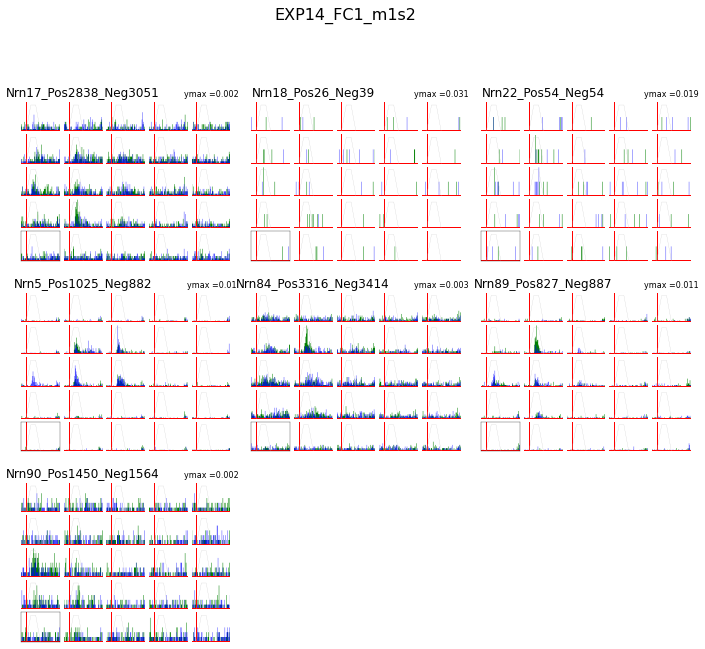

In [9]:
Folder = '/home/matias/WORKSPACE/EXPECTANCY/'
#display_all_PSTHs_of_recording(2, histdata, counts, Folder, 0.010, 0.070, 2, 'EXP2_FC5_' + str(channel))
#display_all_PSTHs_of_recording(exp, histdata, counts, Folder, 0.010, 0.070, 2, 'EXP11_FC1_')
group = 2
#display_all_PSTHs_of_recording(exp, histdata, counts, Folder, 0.010, 0.070, group, 'EXP14_FC1_')

display_all_PSTHs_of_recording(exp, histdata, counts, Folder, 0.010, 0.070, group, 'EXP14_FC1_' + shank)



In [34]:
#----------------------------------------------------------------------------------------
# DISPLAY PSTH 
#----------------------------------------------------------------------------------------
def display_all_PSTHs_of_recording(expe, histdata, counts, pdf_files_directory, t_before, t_after, grupete, titles) :
    
    fig = plt.figure(figsize=(12,16.5))
    nrns = len(histdata.keys())
    if nrns <16: 
        layout = [5,3]
    else: layout = [nrns//3+(nrns%3!=0),3]
    outer_grid = gridspec.GridSpec(layout[0], layout[1], wspace=0.1, hspace=0.2)
    
    ii=0
    orderneurons = np.sort(list(histdata.keys()))
    for neuron in orderneurons:
        totalup = 0
        totaldown = 0
        for i in np.arange(25, dtype='int') :
            totalup+=counts[neuron][i][0]
            totaldown+=counts[neuron][i][1]
        
  
        inner_grid = gridspec.GridSpecFromSubplotSpec(5,5,subplot_spec=outer_grid[ii], wspace=0.1, hspace=0.1)
               
        numspikesP= totalup                  
        numspikesN= totaldown
        
        Sig = numpy.zeros(25, dtype=bool)
        PW = 20
        
        
        print('looping neurons: ', neuron)
        display_PSTH(expe, histdata[neuron], counts[neuron], t_before, t_after, fig, inner_grid, neuron)                               
        
        if grupete ==1:
            fig.suptitle(titles + '_multiunits',fontsize=16)
        elif grupete ==3:
            fig.suptitle(titles + '_responsiveMULTIUNITS',fontsize=16)
        else:
            fig.suptitle(titles ,fontsize=16)
        
        ii+=1
    if grupete ==1:                  
        fig.savefig(pdf_files_directory + titles + '_hist_multi.pdf', format='pdf')
    elif grupete==3:
        fig.savefig(pdf_files_directory + titles + '_hist_respMULTI.pdf', format='pdf')
    else:     
        print('printing')
        fig.savefig(pdf_files_directory + titles + '_hist.pdf', format='pdf')


# FUNCTIONS SURPRISE FOR single neuron
# Made for plotting in the surprise analysis

#----------------------------------------------------------------------------------------
# DISPLAY PSTH 
#----------------------------------------------------------------------------------------
# Plot a single neuron PSTH, 25 piezos
def display_PSTH(expe, histdata, counts, t_before, t_after, fig, inner_grid, n) :
   
    #-------------------------------------------
    # Getting data from pickles    
    #PW = sigdata.PW                 # PW for both directions
    #Sig = sigdata.Sig               # Responsive whiskers (significant)
    #SigTop = sigdata.Sig_top        # Top Significant
    #Sig_st = sigdata.Sig_strength   # Response strength
    
    #cgreen = '#ccffcc'
    #cblue=   '#ccccff'
    #cmix =   '#ffcccc' 
    #-------------------------------------------
    # To build histogram values. Here we get number of counts, and get normalization factors
    histlength = (t_before + t_after)*1000 + 1
    
    print(histlength , 'histlength')
    
    numspikesP=0
    numspikesN=0
    nup = np.zeros((25,histlength-1))
    ndown = np.zeros((25,histlength-1))
    fig2 = plt.figure()
    ax = fig2.add_subplot(1,1,1)
    
   
    for i in range(25) :
        if counts[i][0]>0:
            n1, bins, patches = ax.hist(histdata[i][0], bins = np.linspace(-t_before,t_after, histlength))
            nup[i,:] = n1
        if counts[i][1]>0 :
            n2, bins, patches = ax.hist(histdata[i][1], bins = np.linspace(-t_before,t_after, histlength))
            ndown[i,:] = n2
    numspikesP = np.sum(nup)
    numspikesN = np.sum(ndown)
    
    print(numspikesP, numspikesN)
    
    normnum = (1/np.sum(numspikesP+numspikesN))
    height = np.max(np.array([np.max(nup), np.max(ndown)]))/(1/normnum)
    clf() 
    #-------------------------------------------
    # Building a plot for each whisker
    print('looping whiskers')
    for j in range(25) : #I use a dummy variable to sort whisker problems in exp23, j: indicates position, w: data
        w=j
        ax1 = Subplot(fig, inner_grid[j])  # assign plot location, then reasign whisker
        
       
        if j == 0 :       #generate the first axe to share scales
            ax1 = Subplot(fig, inner_grid[j],sharex=ax1,sharey=ax1)     
            ax1.set_xticks([])
            ax1.set_yticks([])
        elif j==20 :  # for the blank whisker we draw a thin box
            ax1 = Subplot(fig,inner_grid[j],sharex=ax1,sharey=ax1)
            ax1.spines['right'].set_linewidth(0.3)
            ax1.spines['top'].set_linewidth(0.3)
            ax1.spines['left'].set_linewidth(0.3)
            ax1.spines['bottom'].set_linewidth(0.3)
            ax1.set_xticks([])
            ax1.set_yticks([])
        else :
            ax1 = Subplot(fig,inner_grid[j],sharex=ax1,sharey=ax1)
            ax1.set_xticks([])
            ax1.set_yticks([])
        
              
        if j!=20:
            ax1.spines['right'].set_visible(False)
            ax1.spines['top'].set_visible(False)
            ax1.spines['left'].set_visible(False)
            ax1.spines['bottom'].set_visible(False)
        #-------------------------------------------------------
        # Plot the histograms
        if np.sum(ndown[w,:])>0:#histdata[w][1].size :
            ax1.hist(histdata[w][1], bins = np.linspace(-t_before, t_after, histlength), color='g', alpha=1.0, edgecolor='none', histtype='stepfilled', label='Pos', weights=np.repeat(normnum, len(histdata[w][1])))
            #ax1.hist(histdata[w][1], bins = np.linspace(-t_before, t_after, histlength), color='g', alpha=1.0, edgecolor='none', histtype='stepfilled', label='Pos')
        if np.sum(nup[w,:])>0:#histdata[w][0].size :
            ax1.hist(histdata[w][0], bins = np.linspace(-t_before, t_after, histlength), color='b', alpha=0.7, edgecolor='none', histtype='stepfilled', label='Neg', weights=np.repeat(normnum, len(histdata[w][0]))) 
            #ax1.hist(histdata[w][0], bins = np.linspace(-t_before, t_after, histlength), color='b', alpha=0.7, edgecolor='none', histtype='stepfilled', label='Neg') 
        #-------------------------------------------------------
        # Set limits and plot 0 line
        ax1.set_xlim(-t_before, t_after)
        ax1.axvline(0, color = 'r', linewidth=1)
        ax1.axhline(0, color = 'r', linewidth=2)
        ymax = 1.02 * height
        ax1.set_ylim(0, ymax)
        #-------------------------------------------------------
        # Plot stimulus
        xvals = np.array([0,0.010,0.020,0.030])
        yvals = np.array([0,ymax*0.9,ymax*0.9,0])
        ax1.plot(xvals, yvals, linewidth=0.2,color = (0.75,0.75,0.75))
        #-------------------------------------------------------
        # Annotating the plot

        if w==4: ax1.set_title('ymax =' + str( np.around(height,decimals = 3) ),fontsize=8)
        if w ==1: ax1.set_title('Nrn' + n + '_Pos' + str(int(numspikesP))+ '_Neg' + str(int(numspikesN)),fontsize=12)
        fig.add_subplot(ax1)



In [6]:
#Making the 50 psth time_lists


#starts are FCtimes
#len(stim) is your number of episodes
#timesUP and timesDOWNS are your FCtimes arranged with FCsequence
#codename: how you label your neuron

#----------------------------------------------------------------------------------------
# BUILDS PSTH
#----------------------------------------------------------------------------------------
def BuildPSTH(stim,stimtype, Spikes, sampling_freq, t_before, t_after, starts, stops, exp, meas) :
## The first task is to find the stimulus onset times for each whisker in each sweep in each direction


    stimtimes = {}
    timesUP[w] = []                  fill it!!!
    timesDOWN[w] = []                fill it!!!


    # make an 'output dict'
    # the PSTH will be built on -tbefore:tafter
    hist_inds = {}
    PSTH = {}
    psth = dict()
    psth_times = dict()

    # Loop each neuron and get the spikes.
    for neuron in list(Spikes.keys()):

        codename = 'exp'+ str(exp) + '_' + str(meas) + '_c' + str(neuron)

        psth = AttrDict({'clusnum': neuron,'exp' : int(exp) , 'meas': int(meas[1]) , 'shank': int(meas[3])})

        psth.update(AttrDict({'psth_counts': [] , 'psth_times': [] , 'psth_length': [t_before,t_after] }))

        psth['psth_counts'], psth['psth_times'] = PSTH_spikes(stim, stimtype, stimtimes, Spikes[neuron].spike_times, sampling_freq, t_before, t_after, starts, stops)

        PSTH[codename] = psth

    return PSTH


SyntaxError: invalid syntax (<ipython-input-6-e1b96ec0bc29>, line 17)

In [ ]:
# ORIGINAL MAGIC FUNCTION


#----------------------------------------------------------------------------------------
# PSTH SPIKES
#----------------------------------------------------------------------------------------

def PSTH_spikes(stimulation, stimtimes, spikes, samp, t_before, t_after, starts):
    """
    stimulation   : a list of numpy arrays with a n*t stimulus inside
    stimtimes     : a list of times the stimulus occurred for each whisker
    spikes        : an array that contains the spike times (s)
    Vtag1         : synchronises stimulus with spike times
    samp          : sampling rate of the stimulation (Hz)
    t_before      : duration before the stim (positive, s)
    t_after       : duration after the stim (positive, s)
    starts        : the start of the F sweeps
    stops         : the stops of the F sweeps
    """

    stim_samp = 1/.0009997575757
    
    spikes_test = spikes[6].spike_times

    
    spikecountsup = 0
    spikecountsdown = 0
    PSTH_spike_counts = {}

    
    
    
    
    
    PSTH_spike_counts = {}
    for w in np.arange(25, dtype='int') :
        spikecountsup = 0
        spikecountsdown = 0


#COMMENT: in this loop you put the real times. In your case you have to add 3.1 seconds per episode.
#It also counts the number of spikes for each w,z pair

        for i in np.arange(len(stimulation), dtype='int') :
            for x in np.arange(len(stimtimes[w][0][i]), dtype='int') :  # we must look at the number of stimulations per whisker per stimulation block and this is no longer 4
                timesUP = starts[i] + stimtimes[w][0][i][x]/stim_samp # stimtimes is now stimtimes[whisker][0 for UP, 1 for DOWN][stimsweep][trial]
                spikecountsup += len(spikes[(timesUP - t_before < spikes) * (spikes < timesUP + t_after)]) # count spikes that are within PSTH window of stimtimes
            for y in np.arange(len(stimtimes[w][1][i]), dtype='int') : # for the DOWN stimuli we must have a separate loop because they also are now randomly distributed and not 4
                timesDOWN = starts[i] + stimtimes[w][1][i][y]/stim_samp
                spikecountsdown += len(spikes[(timesDOWN - t_before < spikes) * (spikes < timesDOWN + t_after)])
        PSTH_spike_counts[w] = spikecountsup, spikecountsdown

    hist_inds = {} #same changes for this block, each loop will change length depending on how many stimulations fall in a sweep
    for w in np.arange(25, dtype='int') :
        hist_inds[w] = np.zeros(PSTH_spike_counts[w][0]), np.zeros(PSTH_spike_counts[w][1])
        spikecountsup = 0
        spikecountsdown = 0
        for i in np.arange(len(stimulation), dtype='int') :
            for x in np.arange(len(stimtimes[w][0][i]), dtype='int') :     # dynamic loop depends on how many stims fall in sweep
                timesUP = starts[i] + stimtimes[w][0][i][x]/stim_samp
                spikecountup = len(spikes[(timesUP - t_before < spikes) * (spikes < timesUP + t_after)])
                spikeidxup = spikes[(timesUP - t_before < spikes) * (spikes < timesUP + t_after)]
                #spikeidxup = ((spikeidxup - starts[i])/float(stops[i] - starts[i])*len(stimulation[i,0]))
                hist_inds[w][0][spikecountsup:(spikecountsup+spikecountup)] = spikeidxup-timesUP#stimtimes[w][0][i][x]/float(stops[i] - starts[i])*len(stimulation[i,0])
                spikecountsup += spikecountup

            for y in np.arange(len(stimtimes[w][1][i]), dtype='int') :     # dynamic loop depends on how many stims fall in sweep
                timesDOWN = starts[i] + stimtimes[w][1][i][y]/stim_samp
                spikecountdown = len(spikes[(timesDOWN - t_before < spikes) * (spikes < timesDOWN + t_after)])
                spikeidxdown = spikes[(timesDOWN - t_before < spikes) * (spikes < timesDOWN + t_after)]
                #spikeidxdown = ((spikeidxdown - starts[i])/float(stops[i] - starts[i])*len(stimulation[i,0]))
                hist_inds[w][1][spikecountsdown:(spikecountsdown+spikecountdown)] = spikeidxdown-timesDOWN#stimtimes[w][1][i][y]/float(stops[i] - starts[i])*len(stimulation[i,0])
                spikecountsdown += spikecountdown

    return PSTH_spike_counts, hist_inds

# March 25 we took out the rounding from this function, to keep the actual times with respect to stim.
# April modified a little to be more precise with absolute times.